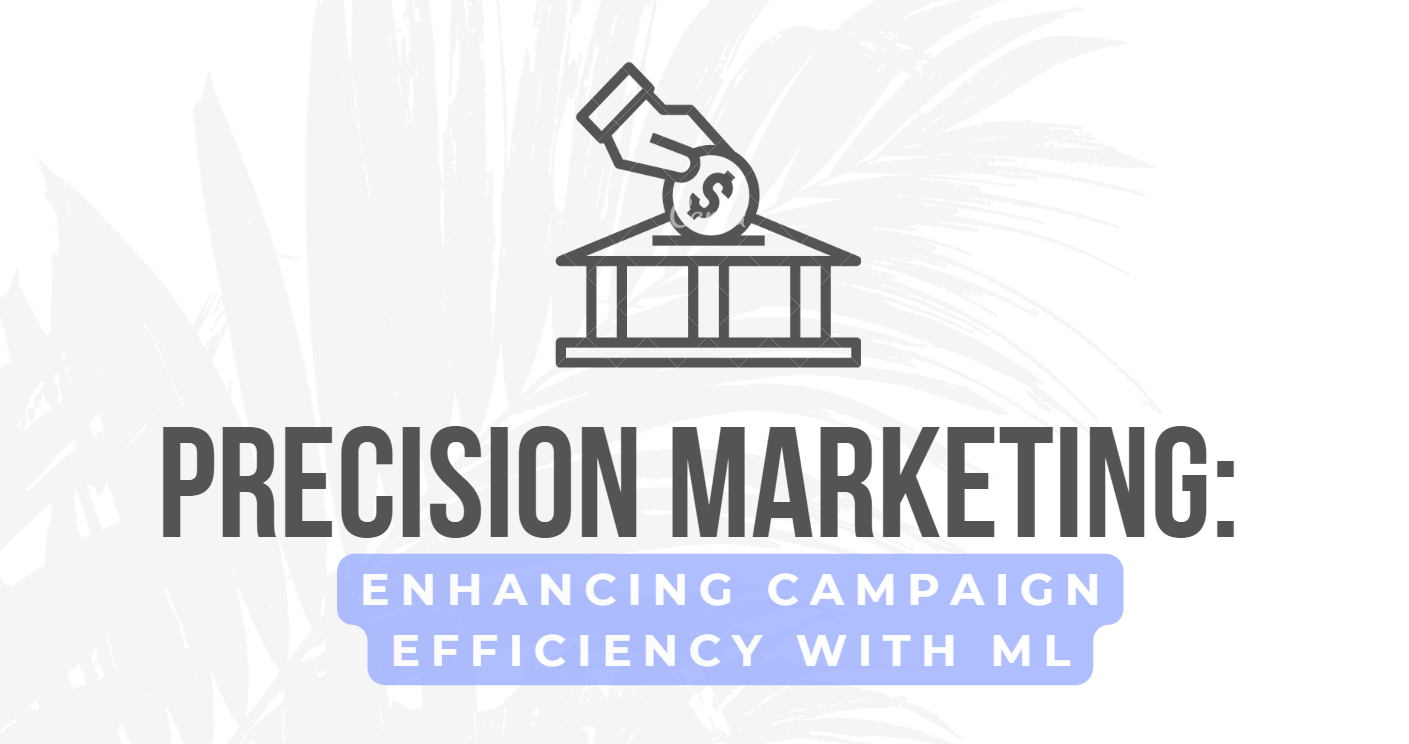



   <a id='top'></a>
## <div class="list-group" id="list-tab" role="tablist"> <p style="background-color:#8fb1e9; padding: 10px;font-family:verdana;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">Table of Contents</p>   
    
* [1. Introduction](#1)
    
* [2. Data Description](#2)
    
* [3. Libraries and Data Loading ](#3)
    
* [4. Data Cleaning](#4)   
    
* [5. Data exploration](#5) 
      
* [6. Assessing Multicollinearity ](#6)
    
* [7. Feature Selection](#7)
    
* [8. Variable Encoding](#8)
   
* [9. Splitting Training and Validation sets](#9)
    
* [10. Model Training](#10)
    
* [11. Handling Class Unbalance](#11)
    
* [12. Class weight Tunning](#12)
    
* [13. Performance Evaluation ](#13)
    
* [14. Conclusion ](#14)

    
    



<a id="1"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED;font-size:100%;text-align:center; padding: 10px;border-radius:10px 10px;">Introduction</p>


**Project Overview:** This project aims to maximize the effectiveness of a bank's marketing campaign by identifying the most promising customers to target for term deposit subscriptions. Leveraging a dataset from past marketing campaigns, we will utilize logistic regression to build a predictive model that helps optimize subscription rates.

 The dataset includes client data and campaign-related information, covering attributes such as age, occupation, marital status, education, and past campaign outcomes. Our primary goal is to predict whether a client will subscribe to a term deposit ('yes' or 'no') based on these attributes and the context of the campaign.

We will explore the data, preprocess it, and employ logistic regression to create a model that guides marketing efforts. Our ultimate aim is to increase subscription rates and make data-driven decisions in future marketing campaigns.

Let's begin by loading and examining the dataset.

 <a id="2"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED;font-size:100%;text-align:center; padding: 10px;border-radius:10px 10px;">Data Description</p>

**Dataset Source:** The dataset used in this project is sourced from Kaggle. These records contain valuable insights into customer interactions and responses to marketing efforts.

**Data Format:** The dataset is provided in a structured format, typically as a CSV file, making it accessible for data analysis and modeling in various data science tools and libraries.

**Key Features:** The dataset includes a range of features that play a crucial role in predicting whether a customer will subscribe to a term deposit in the bank's marketing campaign. The key features include:

- **Age:** The client's age (numeric).
- **Job:** The client's occupation, categorized into classes like (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- **Marital:** Marital status, including (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- **Education:** The client's educational background, with categories like 'high school,' 'university degree,' and 'unknown' (categorical).
- **Default:** Indicates if the client has credit in default, with options 'no,' 'yes,' and 'unknown' (categorical).
- **Housing:** Indicates if the client has a housing loan, with choices 'no,' 'yes,' and 'unknown' (categorical).
- **Loan:** Indicates if the client has a personal loan, with options 'no,' 'yes,' and 'unknown' (categorical).

These features provide essential information about the client's personal and financial background, which can influence their likelihood of subscribing to a term deposit.

The dataset also includes attributes related to the last contact of the current campaign:

- **Contact:** Describes the type of communication used to contact the client, with categories 'cellular' and 'telephone.'
- **Month:** Represents the last contact month of the year, with categories like 'jan,' 'feb,' 'mar,' and more.
- **Day_of_week:** Indicates the last contact day of the week, including 'mon,' 'tue,' 'wed,' 'thu,' and 'fri.'
- **Duration:** Represents the duration of the last contact in seconds.

Additional attributes in the dataset include campaign-related and economic context features, as well as the target variable:

- **Campaign:** The number of contacts performed during this campaign and for this client (numeric).
- **Pdays:** The number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means the client was not previously contacted).
- **Previous:** The number of contacts performed before this campaign and for this client (numeric).
- **Poutcome:** The outcome of the previous marketing campaign, with categories 'failure,' 'nonexistent,' and 'success.'

The economic context attributes are as follows:

- **Emp.var.rate:** Employment variation rate, a quarterly indicator (numeric).
- **Cons.price.idx:** Consumer price index, a monthly indicator (numeric).
- **Cons.conf.idx:** Consumer confidence index, a monthly indicator (numeric).
- **Euribor3m:** Euribor 3-month rate, a daily indicator (numeric).
- **Nr.employed:** The number of employees, a quarterly indicator (numeric).

The target variable for this project is:

- **y:** Indicates whether the client has subscribed to a term deposit, with binary options 'yes' and 'no.'

These features provide the foundation for our predictive modeling, as they help us understand the factors influencing a client's decision to subscribe to the term deposit.


<a id="3"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Libraries and Data Loading</p>



Before we begin exploring and preprocessing the data, let's import the necessary Python libraries:


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


Now, let's start by getting an overview of the dataset.
We'll display basic statistics, such as the number of rows, columns, and data types.

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
 df.columns


Index(['age', 'education', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<a id="4"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Data Cleaning</p>
In this section, we'll describe how we handled missing values, duplicated rows, or outliers, ensuring that the data is ready for analysis and modeling.

###  Checking for Missing Values

To ensure the data's integrity, we performed a thorough check for missing values in the dataset. We used the following code to identify any columns with missing values:

**Results:**

All columns show zero missing values, indicating that the dataset is complete and does not require any imputation for missing data.

In [5]:
# Check for missing values in the entire dataset
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


###  Checking for Duplicated Rows

We conducted an investigation to identify and address duplicated rows within the dataset. 
Duplicated rows can affect the quality and integrity of the data, potentially leading to biased results in our analysis and modeling.

**Results:**
We identified a total of 12 duplicated rows in the dataset, as shown in the output bellow. These rows appear to be identical in terms of all features.

In [4]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [4]:
df.duplicated().sum()

0

**Handling Duplicated Rows:**

Duplicate rows can lead to inaccuracies in our analysis, and it is essential to address them. To do so, we chose to remove the duplicated rows from the dataset. This ensures that our analysis and modeling are based on unique and distinct observations, avoiding any bias introduced by duplicate data.

In [3]:
df = df.drop_duplicates()

<a id="5"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Data Exploration</p>

To gain a better understanding of the dataset, let's start with some data visualizations. Visualizations can provide insights into the distribution and characteristics of the data.

### Distribution of the Target Variable 'y' 

We begin by visualizing the distribution of the target variable 'y' which indicates whether a client subscribed to a term deposit.

**Results:**

*Class Imbalance*

Upon examining the distribution of our binary response variable 'y,' it becomes evident that the data suffers from class imbalance. The majority of the clients fall into the 'no' category, indicating those who did not subscribe to a term deposit, while a smaller proportion belongs to the 'yes' category, representing clients who did subscribe.

- Class Distribution:
  - 'no': 36,537 clients
  - 'yes': 4,639 clients

- Percentage Distribution:
  - 'no': 88.73%
  - 'yes': 11.27%

Class imbalance poses a significant challenge in binary classification tasks. In our case, the 'yes' class (clients who subscribed) is underrepresented, which may lead to misclassification issues, particularly for the minority class.

To ensure accurate modeling and evaluation, we will address the class imbalance problem by employing appropriate techniques such as data weighing, or alternative evaluation metrics. These strategies will help maximize the predictive power of our model and avoid undue bias toward the majority class.

The next steps involve preprocessing the data, building a predictive model, and evaluating its performance while considering the class imbalance issue. This will ultimately lead to insights and recommendations for maximizing the marketing campaign's effectiveness and identifying the right customers to target.

C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


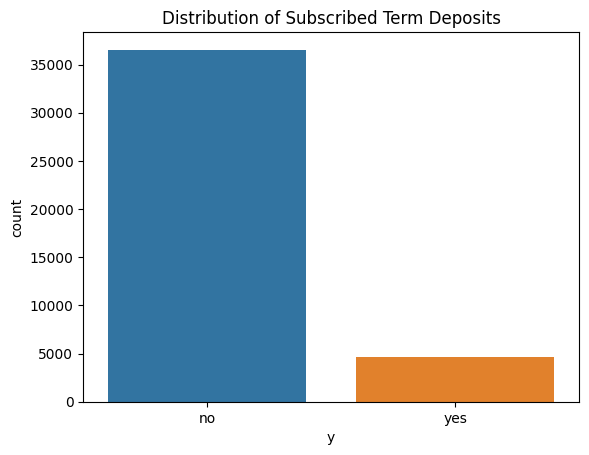

In [15]:
# Distribution of the target variable 'y'
sns.countplot(x='y', data=df)
plt.title('Distribution of Subscribed Term Deposits')
plt.show()

In [8]:

# counts of distribution
class_distribution = df['y'].value_counts()

# Calculate the percentage distribution
percentage_distribution = class_distribution / class_distribution.sum()

print("Class Distribution:")
print(class_distribution)

print("Percentage Distribution:")
print(percentage_distribution)


Class Distribution:
y
no     36537
yes     4639
Name: count, dtype: int64
Percentage Distribution:
y
no     0.887337
yes    0.112663
Name: count, dtype: float64


C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


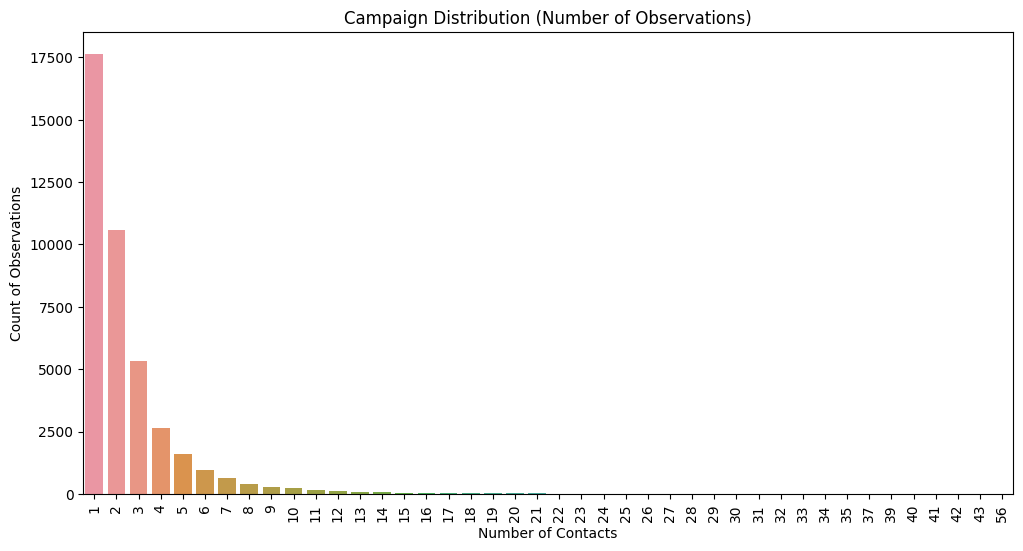

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64


C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


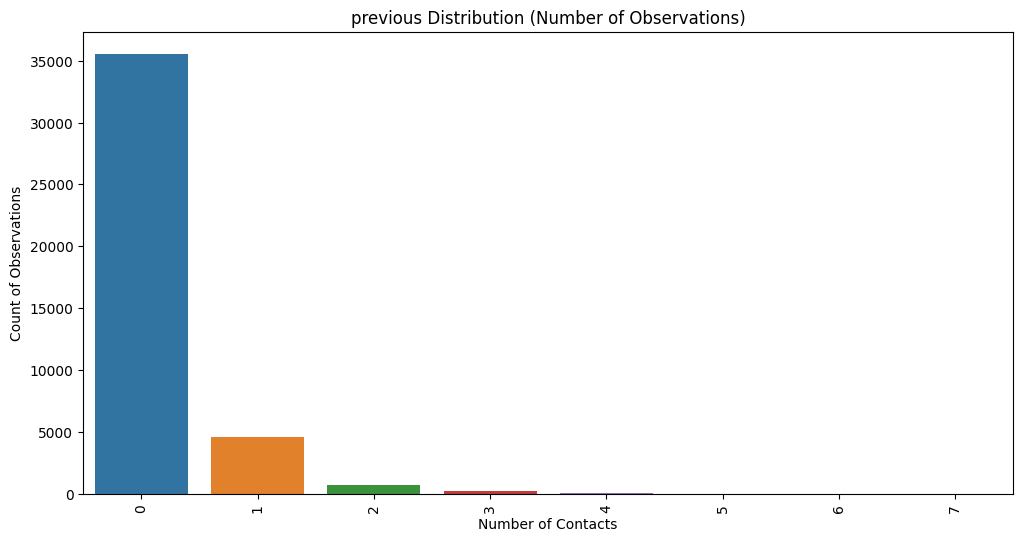

previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64


In [7]:
# Create a bar plot for the 'campaign' variable
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='campaign')
plt.title('Campaign Distribution (Number of Observations)')
plt.xlabel('Number of Contacts')
plt.ylabel('Count of Observations')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

df['campaign'].unique()

campaign_counts = df['campaign'].value_counts()
print(campaign_counts)

# Create a bar plot for the 'campaign' variable
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='previous')
plt.title('previous Distribution (Number of Observations)')
plt.xlabel('Number of Contacts')
plt.ylabel('Count of Observations')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

df['previous'].unique()

campaign_counts = df['previous'].value_counts()
print(campaign_counts)



### 4.2 Distribution of predictors:

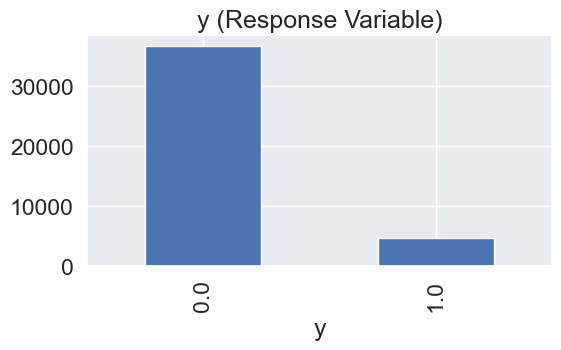

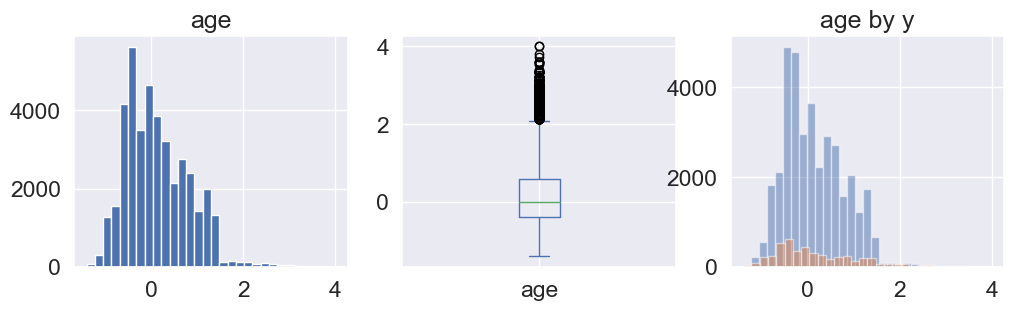

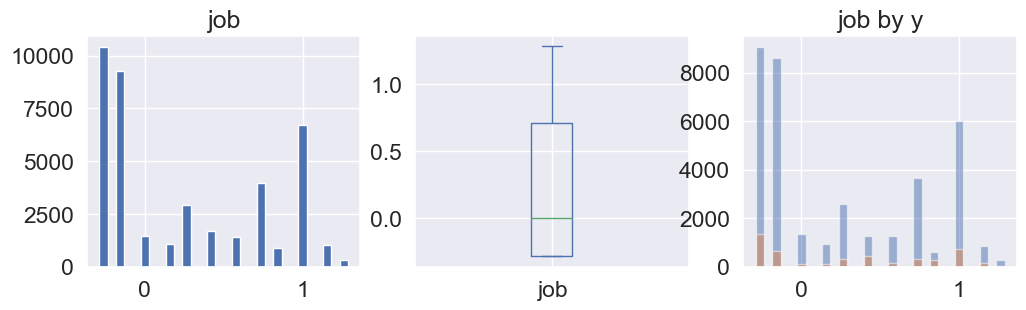

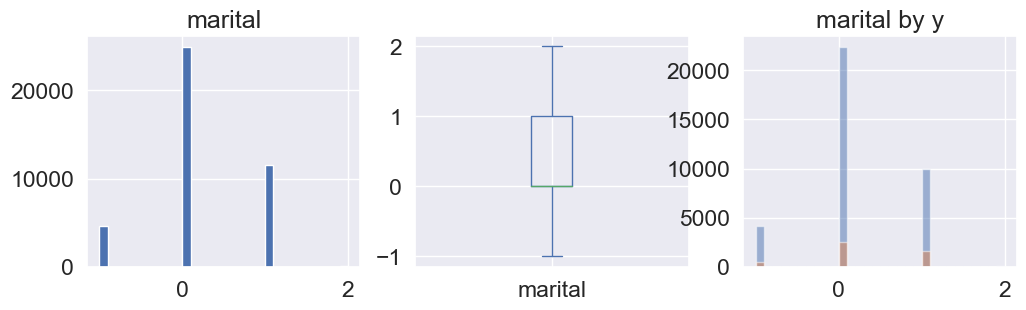

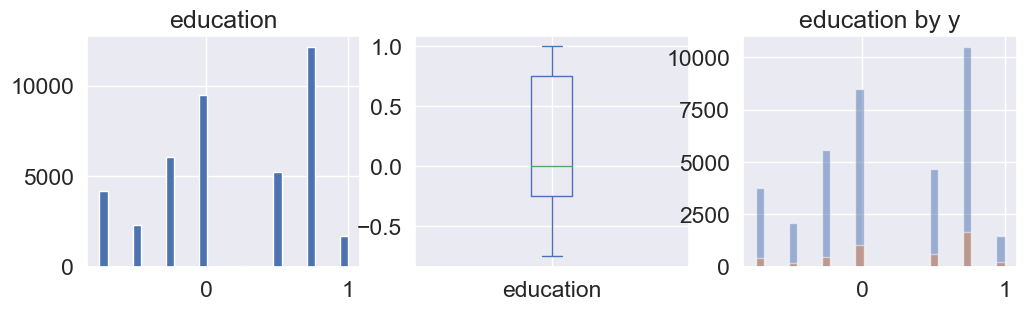

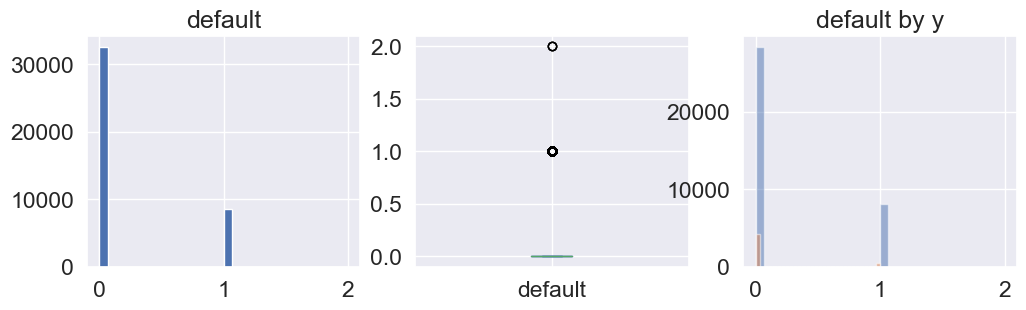

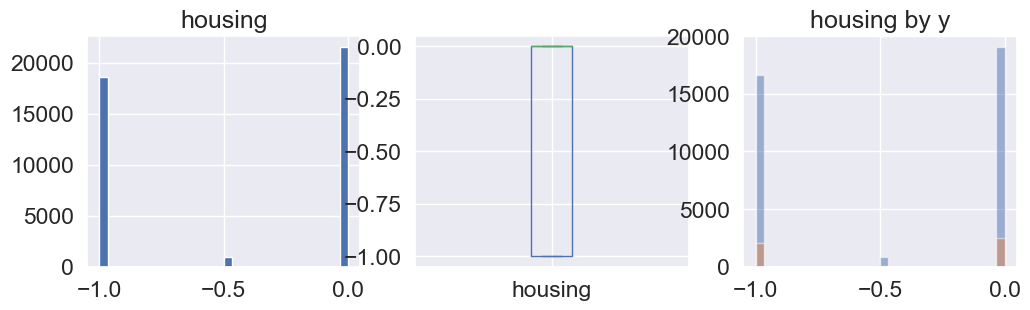

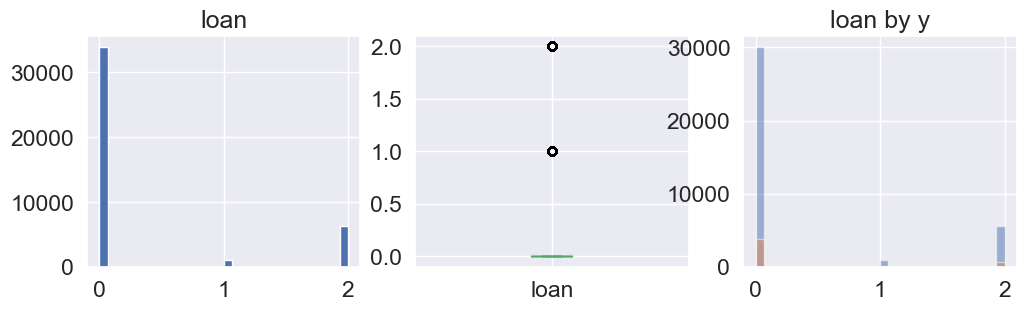

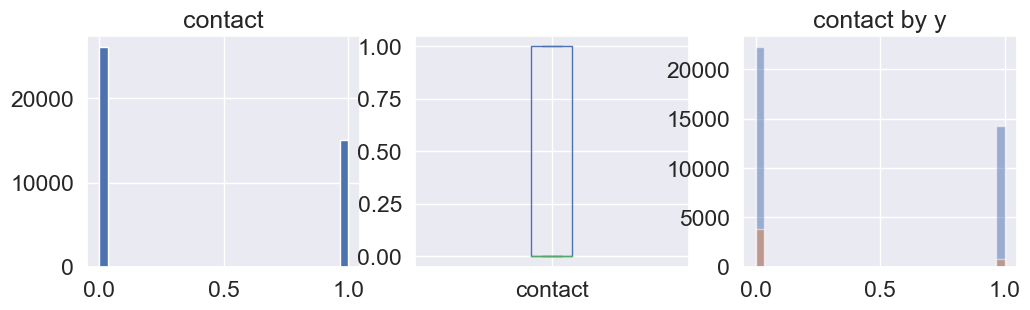

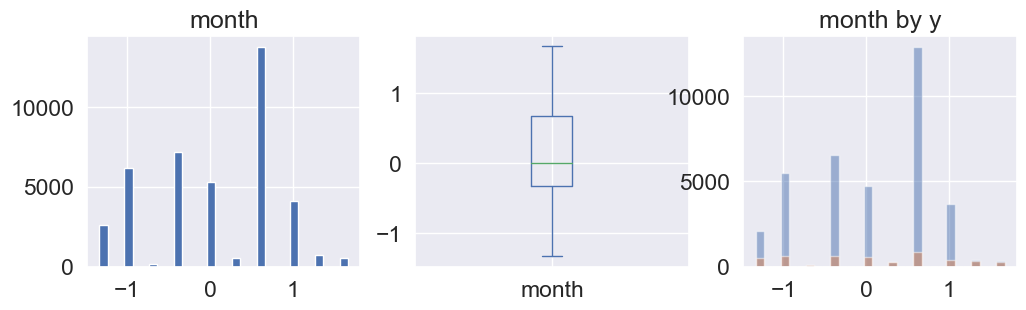

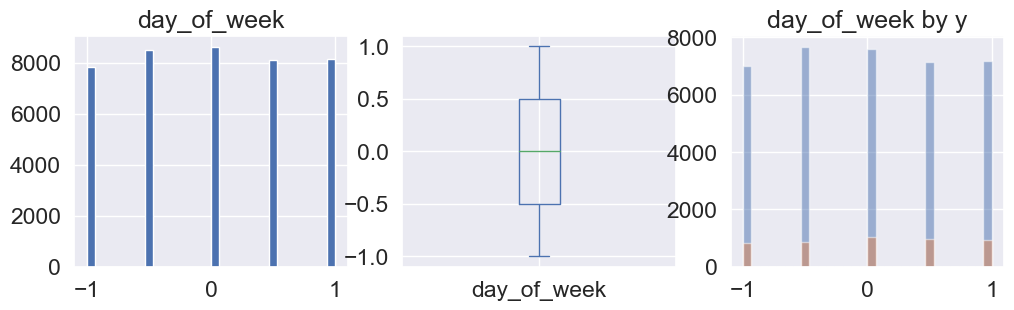

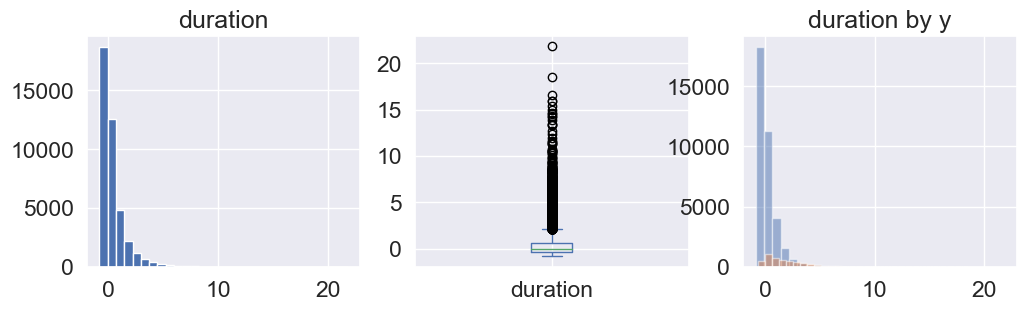

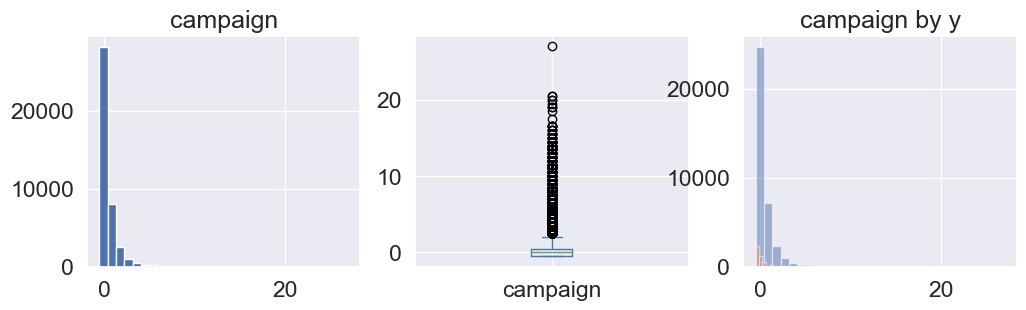

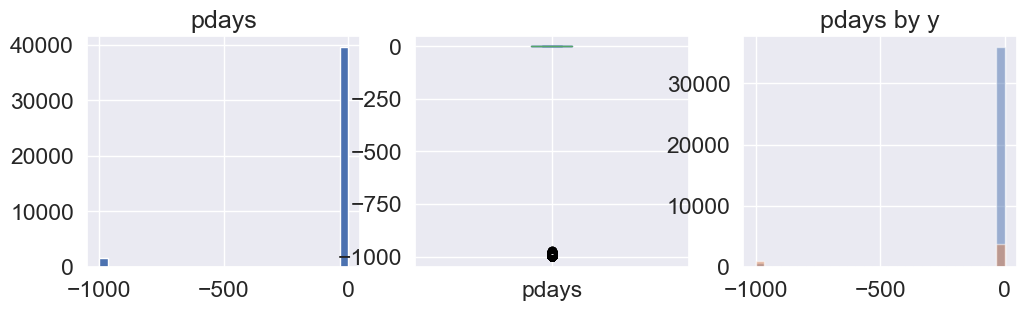

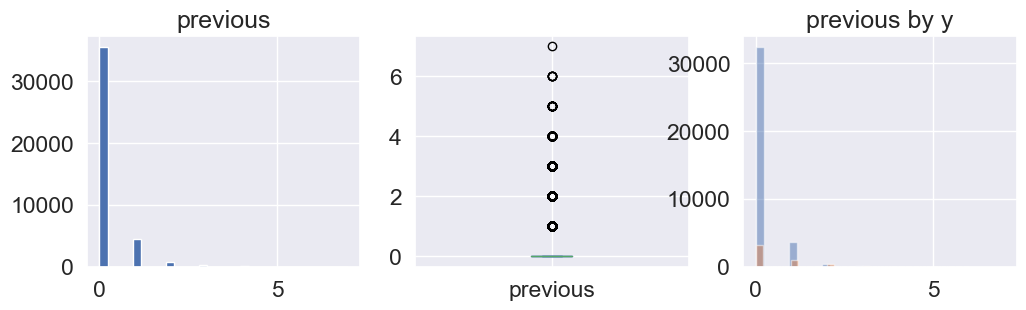

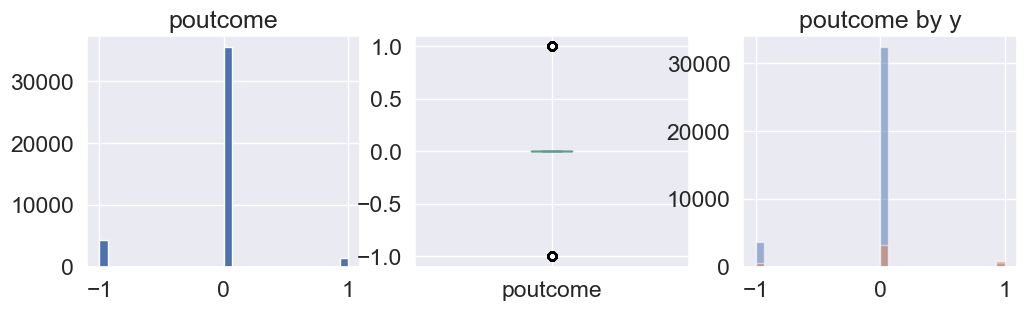

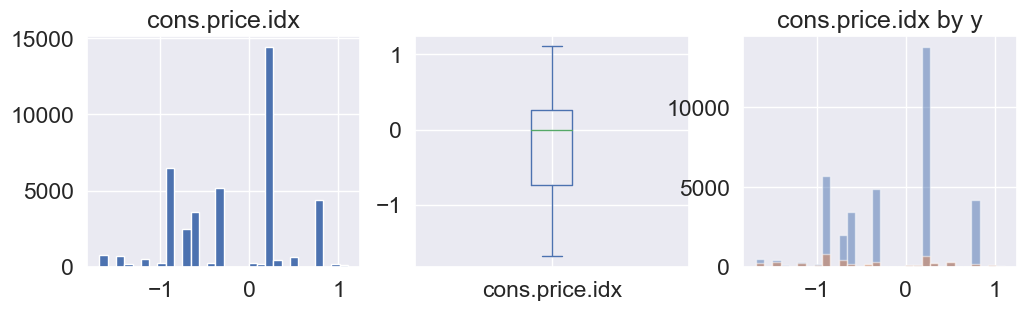

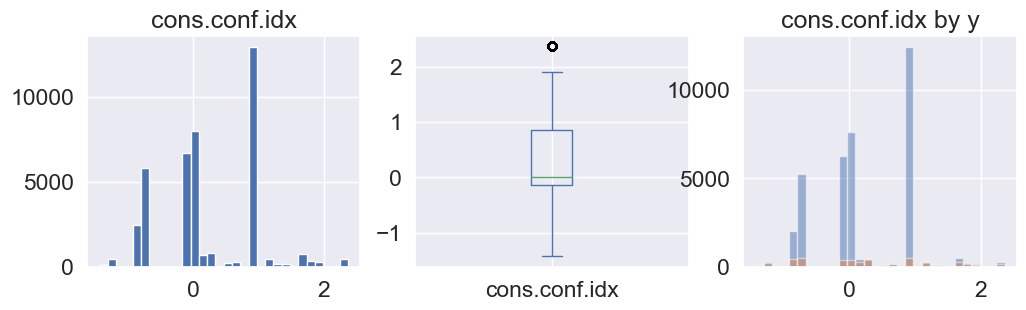

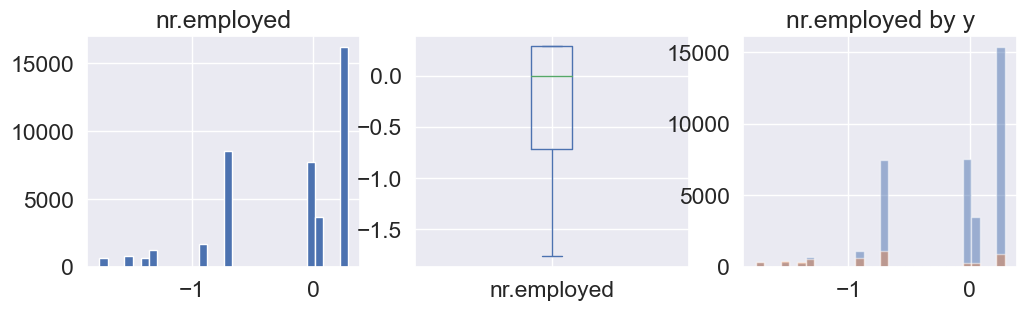

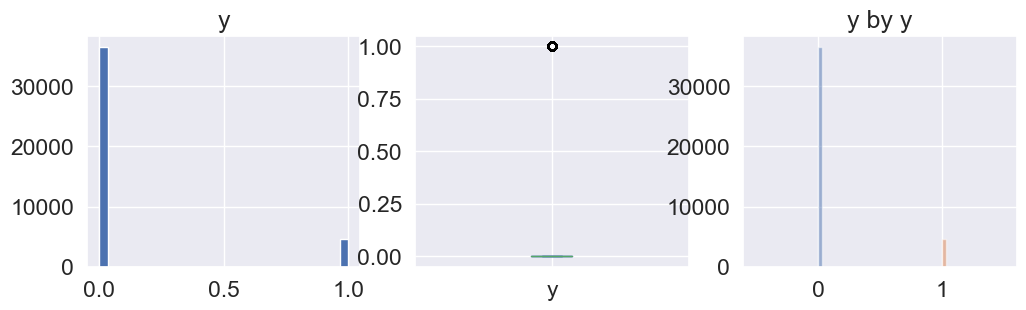

In [137]:
import matplotlib.pyplot as plt

# Plot the distribution of 'y' (response variable)
plt.figure(figsize=(6, 3))
df['y'].value_counts().plot(kind='bar')
plt.title('y (Response Variable)')
plt.show()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

# Plot histograms + box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 3, 1)
    df[col].hist(bins=30)
    plt.title(col)

    plt.subplot(1, 3, 2)
    df[col].plot(kind='box')
    
    plt.subplot(1, 3, 3)
    df.groupby('y')[col].hist(bins=30, alpha=0.5)
    plt.title(f'{col} by y')
    
    plt.show()

C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

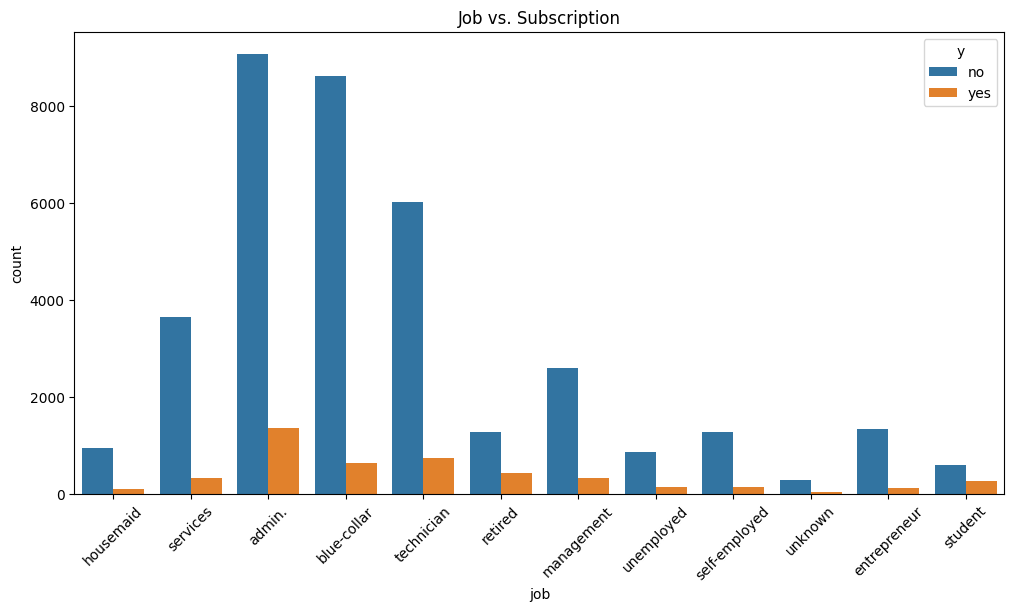

In [14]:
# Categorical variable distributions
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df, hue='y')
plt.title('Job vs. Subscription')
plt.xticks(rotation=45)
plt.show()

C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

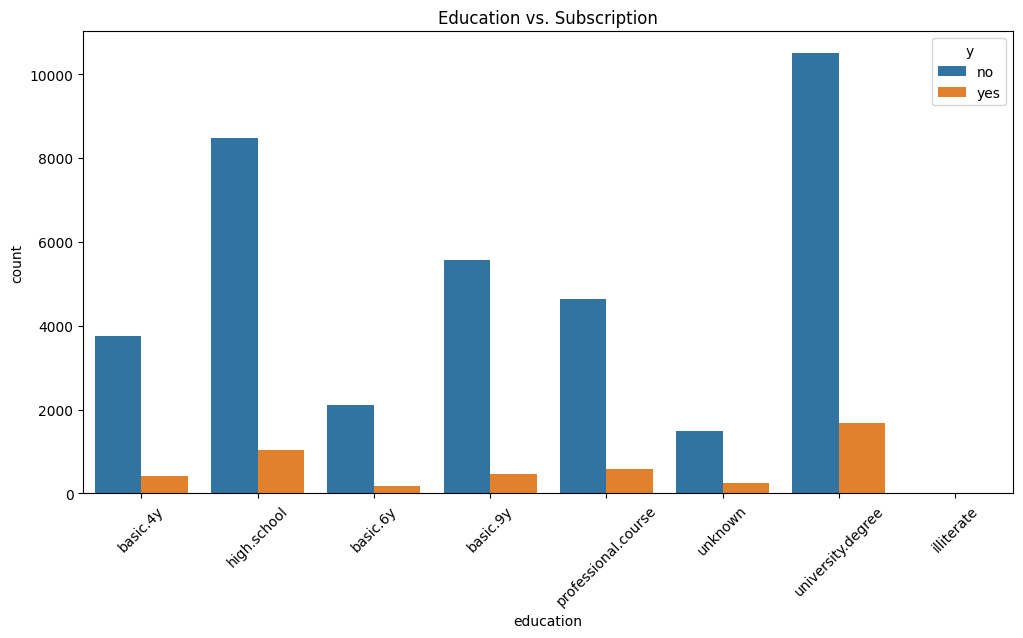

In [14]:

plt.figure(figsize=(12, 6))
sns.countplot(x='education', data=df, hue='y')
plt.title('Education vs. Subscription')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Calculate the percentage of subscribers for each category of 'job'
job_subscription_percentage = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0) * 100

# Calculate the percentage of subscribers for each category of 'education'
education_subscription_percentage = df.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0) * 100


# Sort by the percentage of 'yes' subscribers in descending order
job_subscription_percentage_sorted = job_subscription_percentage.sort_values(by='yes', ascending=False)


# Sort by the percentage of 'yes' subscribers in descending order
Education_subscription_percentage_sorted = education_subscription_percentage.sort_values(by='yes', ascending=False)

# Display the sorted table
print("Percentage of Subscribers by Job (Sorted):")
print(job_subscription_percentage_sorted)

print("\nPercentage of Subscribers by Education:")
print(Education_subscription_percentage_sorted)


Percentage of Subscribers by Job (Sorted):
y                     no        yes
job                                
student        68.571429  31.428571
retired        74.738068  25.261932
unemployed     85.798817  14.201183
admin.         87.033305  12.966695
management     88.782490  11.217510
unknown        88.787879  11.212121
technician     89.167532  10.832468
self-employed  89.514426  10.485574
housemaid      90.000000  10.000000
entrepreneur   91.483516   8.516484
services       91.857827   8.142173
blue-collar    93.104939   6.895061

Percentage of Subscribers by Education:
y                           no        yes
education                                
illiterate           77.777778  22.222222
unknown              85.491329  14.508671
university.degree    86.279184  13.720816
professional.course  88.645038  11.354962
high.school          89.161060  10.838940
basic.4y             89.750958  10.249042
basic.6y             91.793976   8.206024
basic.9y             92.175352   7

C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

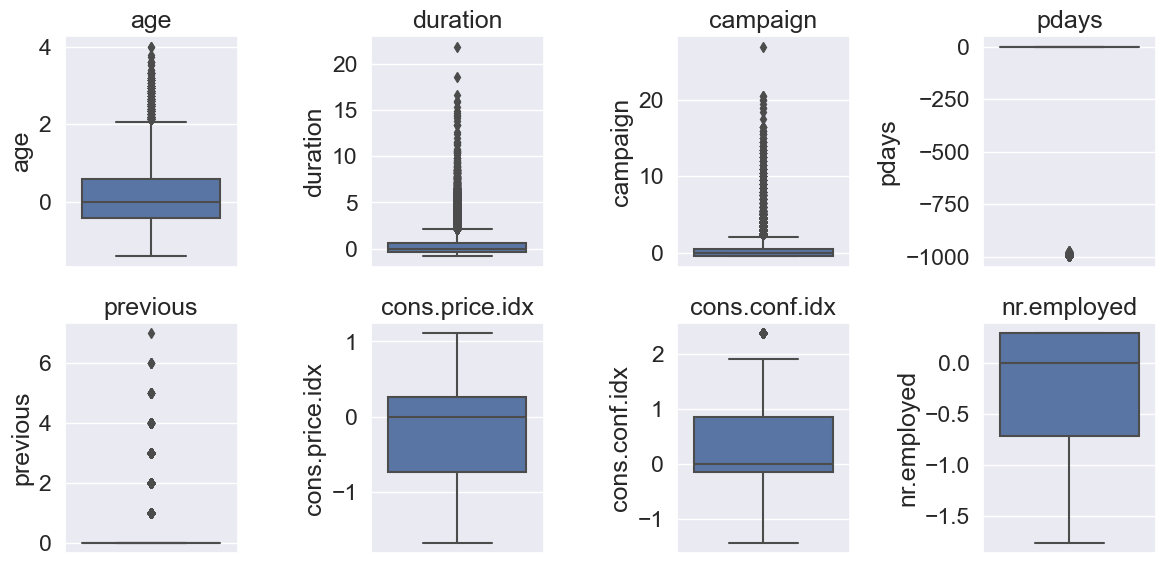

In [135]:
# Exclude non-numeric columns
exclude_columns = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
numerical_columns = [col for col in df.columns if col not in exclude_columns]

# Create box plots for numerical variables
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()


<a id="6"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Asseessing Multicollinearity</p>

Collinearity refers to the statistical phenomenon where two or more predictor variables in a model are highly correlated. In simpler terms, it means that one predictor can be linearly predicted from the others, leading to redundancy in the model. On the heatmap below we observe that the predictors 'euribor3m', 'nr.employed', 'emp.var.rate', and 'cons.price.idx' seem to be highly correlated. 

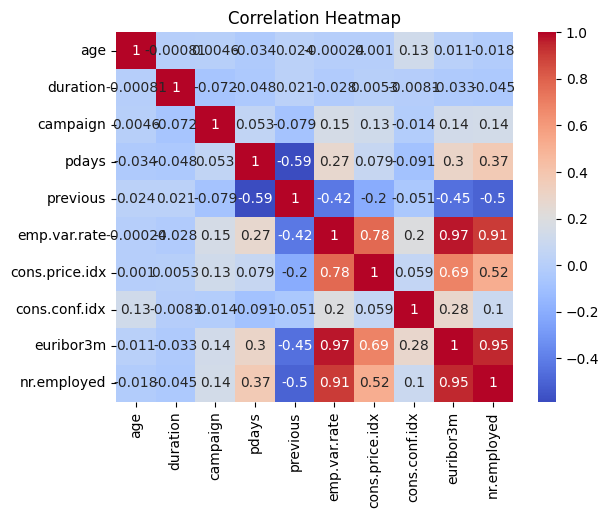

In [8]:
# Correlation Heatmap for Numeric Variables
corr = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<a id="7"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Feature Selection with Random Forest</p>

To address multicollinearity, we will train a Random Forest model and keep the most influential features:

Random Forest Model: We trained a random forest model on the predictors exhibiting potential collinearity. Random forests are robust to multicollinearity, and their variable importance measures can help identify which predictors are the most influential.

Variable Importance: After training the random forest, we examined the variable importance scores. By doing so, we could assess the relative significance of each predictor in making predictions. Predictors with lower variable importance scores were considered less influential.

Removing Less Significant Predictors: Based on the variable importance scores, we decided to drop the least significant predictors among the correlated ones. This helped reduce multicollinearity and made our model more interpretable.

**Results**

We used importance scores to decide which of the multicolinear variable should be dropped. 



In [4]:
# Selecting features and target
X = df[['euribor3m', 'nr.employed', 'emp.var.rate',  'cons.price.idx']]
y = df['y'].map({'yes': 1, 'no': 0})  # Converting 'yes' and 'no' to binary

# Training the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Mapping features to their importance
features_dict = dict(zip(X.columns, feature_importances))

# Sorting and displaying the features by importance
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)

print(sorted_features)

[('euribor3m', 0.48358482350013116), ('nr.employed', 0.39424611820652), ('emp.var.rate', 0.06527201902285833), ('cons.price.idx', 0.056897039270490626)]


In [5]:
df.drop(['emp.var.rate'],axis=1,inplace=True)
df.drop(['cons.price.idx'],axis=1,inplace=True)
df.drop(['nr.employed'],axis=1,inplace=True)
df.drop(['duration'],axis=1,inplace=True)

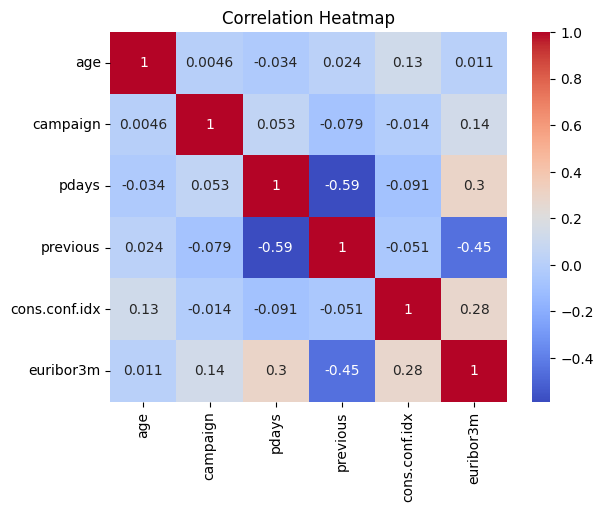

In [6]:
# Correlation Heatmap for Numeric Variables
corr = df[['age',  'campaign', 'pdays', 'previous', 'cons.conf.idx', 'euribor3m']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<a id="8"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Variable Encoding</p>


Encoding categorical variables is a critical step. Categorical variables represent non-numeric data, such as job titles or months of the year. Machine learning models require numerical input, so encoding is necessary.

We used two methods for encoding: One-Hot Encoding and Label Encoding.

One-Hot Encoding is suitable for nominal variables with no inherent order. For example, 'month' categories are converted into binary columns, preserving independence among categories.

Label Encoding is employed for ordinal variables with a clear order, like 'education.' It assigns numerical values based on the category's position in the order, preserving ordinal relationships.

The choice of encoding method is essential for accurate modeling, and we applied the appropriate method to each categorical variable based on its characteristics

In [7]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [8]:
# List of non-numeric columns excluding 'education' and target
non_numeric_cols.remove('education')
non_numeric_cols.remove('y')

# One-Hot Encoding for all non-numeric columns except 'education'
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)  # drop_first to avoid dummy variable trap

# Label Encoding for 'education'
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df.head()

,age,education,campaign,pdays,previous,cons.conf.idx,euribor3m,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,1,999,0,-36.4,4.857,no,False,False,...,True,False,False,False,True,False,False,False,True,False
1,57,3,1,999,0,-36.4,4.857,no,False,False,...,True,False,False,False,True,False,False,False,True,False
2,37,3,1,999,0,-36.4,4.857,no,False,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,1,999,0,-36.4,4.857,no,False,False,...,True,False,False,False,True,False,False,False,True,False
4,56,3,1,999,0,-36.4,4.857,no,False,False,...,True,False,False,False,True,False,False,False,True,False


<a id="9"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Training and Validation Sets</p>
Training Set:

In machine learning, it's crucial to evaluate model performance accurately. We start by dividing our dataset into a training set. This is the portion of data used to train our predictive model. The model learns patterns, relationships, and features within this dataset.

Test Set:

The test set is distinct from the training set and serves a different purpose. After the model has been trained, we evaluate its performance on data it hasn't seen before—this is where the test set comes in. The test set is kept separate throughout the model-building process to ensure an unbiased assessment of how well the model generalizes to new, unseen data.

These two sets are essential for measuring our model's effectiveness and ensuring that it doesn't simply memorize the training data but can make accurate predictions on new data. This process helps us avoid overfitting, where the model is too closely tailored to the training data and struggles to perform well on new, unseen data.

In [9]:
from sklearn.model_selection import train_test_split
X=df.drop('y',axis=1)
y=df['y']
y = (y == 'yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<a id="10"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Model Training - Logistic Regression</p>
In this step of the project, we employ a logistic regression classifier to predict whether customers will subscribe to a term deposit. Logistic regression is a suitable choice because of its effectiveness in binary classification tasks. By training the model on the training data and evaluating its performance on the test data, we will gain valuable insights into how well the chosen features can predict customer behavior. This is a critical stage in optimizing the marketing campaign, as it helps us target the right customers efficiently. The model will provide probabilities of subscription, allowing us to set appropriate thresholds for decision-making. 

In [11]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [12]:
# Predicting on the test data
pred_test = lr.predict(X_test)

In [13]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

The f1 score for the testing data: 0.31629908552985475


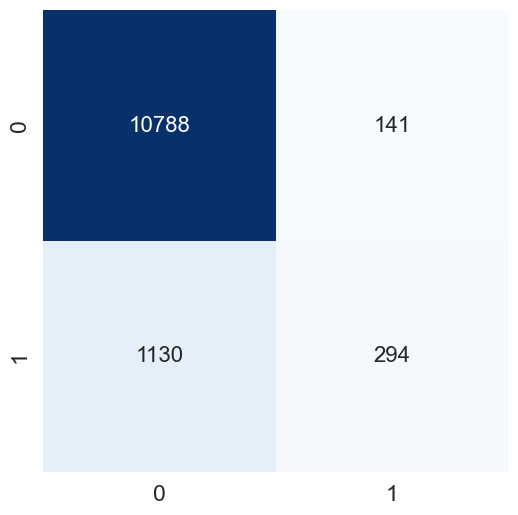

In [14]:
# Function to create a confusion matrix
def conf_matrix(y_test, pred_test):
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    # Plotting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

# Calling the function
conf_matrix(y_test, pred_test)


In [30]:
from sklearn.metrics import classification_report
# Calculate precision, recall, and f1-score
report = classification_report(y_test, pred_test, target_names=['Actual 0', 'Actual 1'], output_dict=True)
print(report)

{'Actual 0': {'precision': 0.9051854337976171, 'recall': 0.987098545155092, 'f1-score': 0.9443690637720489, 'support': 10929.0}, 'Actual 1': {'precision': 0.6758620689655173, 'recall': 0.20646067415730338, 'f1-score': 0.31629908552985475, 'support': 1424.0}, 'accuracy': 0.8971100137618392, 'macro avg': {'precision': 0.7905237513815672, 'recall': 0.5967796096561977, 'f1-score': 0.6303340746509518, 'support': 12353.0}, 'weighted avg': {'precision': 0.8787500357954386, 'recall': 0.8971100137618392, 'f1-score': 0.8719678940952995, 'support': 12353.0}}


<a id="11"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Handling Class Unbalance</p>
Recognizing the class imbalance in our data, we apply a different logistic regression model. This new model incorporates a class weight parameter that assigns different weights to the classes based on their distribution. By giving more weight to the minority class (subscribed), we aim to address the issue of imbalance.

In the second logistic regression model, which uses the 'newton-cg' solver and class weights, the F1 score for the testing data improves to approximately 0.5835. This enhancement showcases the model's improved ability to correctly identify subscribers and, therefore, its potential to enhance the efficiency of our marketing campaign.

Conclusion
In summary, our analysis reveals the importance of addressing class imbalance when working with binary classification tasks. By fine-tuning the logistic regression model to consider class weights, we obtain a significantly better F1 score, indicating that the model is more adept at recognizing subscription behavior. This result guides us towards the most efficient allocation of marketing resources and helps in targeting the right customers for our campaign.

In [15]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [16]:
# Predicting on the test data
pred_test = lr.predict(X_test)

In [17]:
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

The f1 score for the testing data: 0.43911701875148346


Here we already see an inproovement on the model of 12%

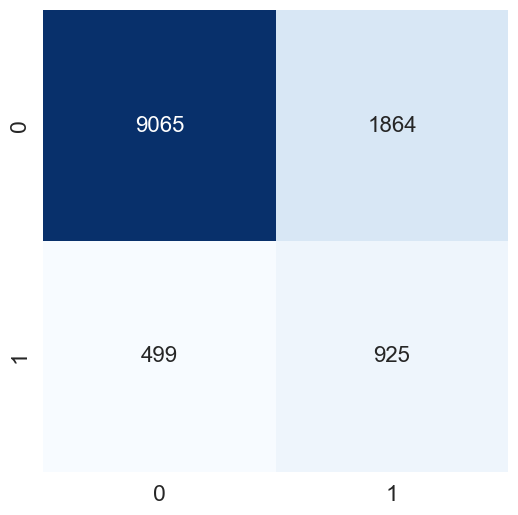

In [18]:
#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

In [24]:
report = classification_report(y_test, pred_test, target_names=['Actual 0', 'Actual 1'], output_dict=True)
print(report)

{'Actual 0': {'precision': 0.939883953200799, 'recall': 0.9041083356208254, 'f1-score': 0.9216490998973976, 'support': 10929.0}, 'Actual 1': {'precision': 0.43043478260869567, 'recall': 0.5561797752808989, 'f1-score': 0.4852941176470588, 'support': 1424.0}, 'accuracy': 0.8640006476159637, 'macro avg': {'precision': 0.6851593679047473, 'recall': 0.7301440554508621, 'f1-score': 0.7034716087722283, 'support': 12353.0}, 'weighted avg': {'precision': 0.8811568732264482, 'recall': 0.8640006476159637, 'f1-score': 0.8713479993773229, 'support': 12353.0}}


<a id="12"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Optimal Class Weight Tuning</p>


In this section, we embark on a journey to discover the optimal class weight for our logistic regression model. As mentioned previously, our dataset exhibits class imbalance, with a considerably larger number of 'no' responses compared to 'yes' responses, i.e., customers not subscribing to a term deposit significantly outnumber those who do. To mitigate this imbalance and enhance the model's predictive ability, we explore different class weights.

Grid Search for Class Weights
We utilize the scikit-learn library to conduct a grid search, a powerful technique for hyperparameter tuning. The parameter of interest in this search is the 'class_weight' parameter in our logistic regression model. This parameter allows us to assign different weights to the classes based on their distribution. We aim to find the right balance that optimizes the model's performance in predicting subscription behavior.

Evaluating F1 Score
We evaluate the performance of each weight combination using the F1 score. The F1 score provides a balanced measure of precision and recall, making it a suitable choice for binary classification tasks.

Visualizing Results
To provide a visual representation of our findings, we plot the F1 score against the weight assigned to class '1' (subscribed). The graph demonstrates how changes in class weights impact the model's ability to predict term deposit subscriptions. Our aim is to identify the weight configuration that maximizes the F1 score, indicating a model that excels at both precision and recall for predicting positive responses.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

Text(0.5, 1.0, 'Scoring for different class weights')

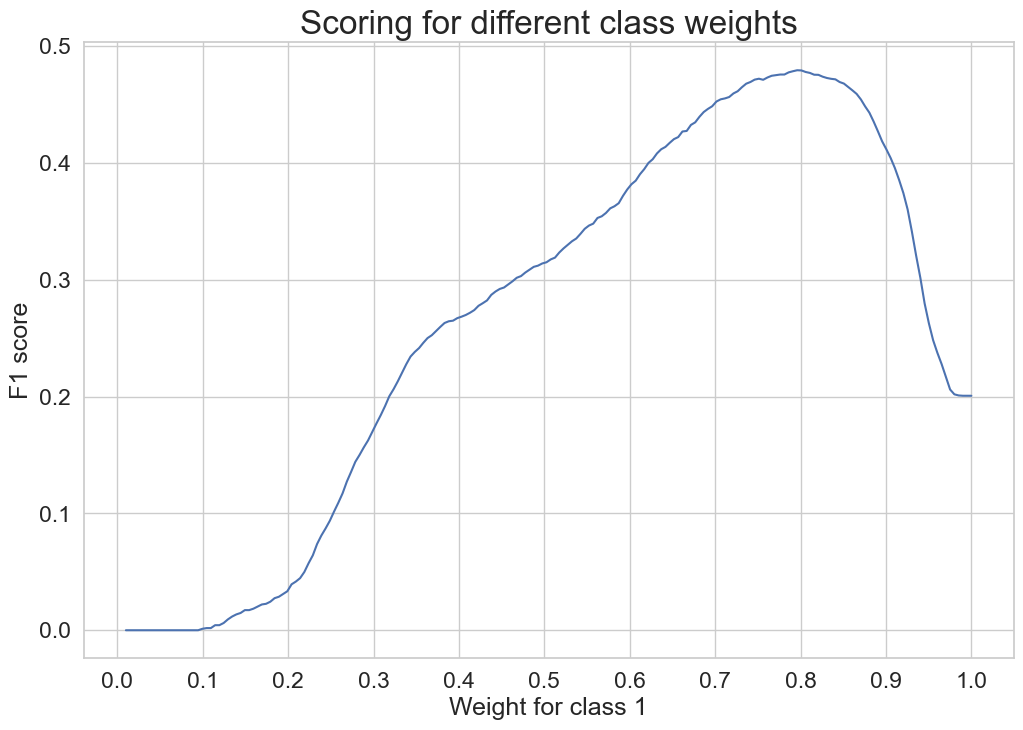

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(x='weight', y='score', data=weigh_data) 
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Here we need to decide rather we want to minimize the chance of reaching out to customers that wont subscribe,(then prioritize precision 0:.3 and 1=7) (minimize false positives), 
or we prefer to minize the risk of not being able to identify good customers (then prioritize recal) 0=.12 1=.88

The f1 score for the testing data: 0.4852941176470588


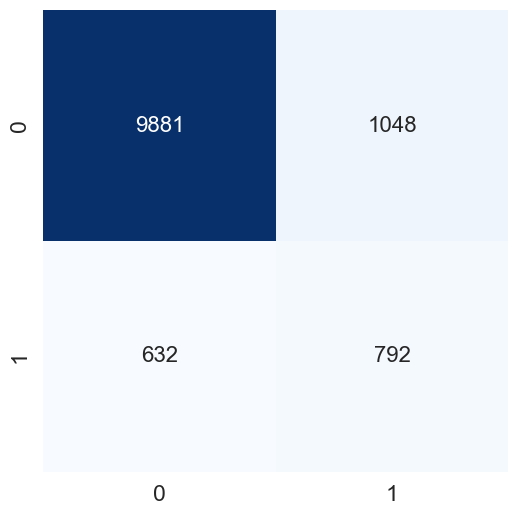

In [20]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.19, 1: 0.81})
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

improoves to 48.10%

In [21]:
# Calculate and print the test accuracy
accuracy_test = accuracy_score(y_test, pred_test)
print('The test accuracy:', accuracy_test)


The test accuracy: 0.8640006476159637


In [25]:
# Calculating and printing the F1 score for the testing data
f1_test = f1_score(y_test, pred_test)
print('The F1 score for the testing data:', f1_test)

# Calculating and printing the accuracy
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy:', accuracy)

# Generating a classification report
class_report = classification_report(y_test, pred_test, target_names=['Actual 0', 'Actual 1'])
print(class_report)

The F1 score for the testing data: 0.4852941176470588
Accuracy: 0.8640006476159637
              precision    recall  f1-score   support

    Actual 0       0.94      0.90      0.92     10929
    Actual 1       0.43      0.56      0.49      1424

    accuracy                           0.86     12353
   macro avg       0.69      0.73      0.70     12353
weighted avg       0.88      0.86      0.87     12353



<a id="13"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Performance Evaluation</p>

In this section, we evaluate the performance of two logistic regression models on our dataset. The primary goal of our analysis is to predict whether customers will subscribe to a term deposit, and this analysis is crucial for optimizing our marketing campaign. As part of this exploration, we initially train a logistic regression model and then introduce an enhanced version to account for the unbalanced nature of our data.





## Evaluating Model Performance with ROC Curve:

In this section, we assess the logistic regression model's performance using the Receiver Operating Characteristic (ROC) curve, a valuable tool for evaluating binary classification models.

**Understanding the ROC Curve:**
The ROC curve provides a visual representation of a model's ability to discriminate between classes. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values. The diagonal line (the random classifier) represents an area under the curve (AUC) of 0.5, while a perfect classifier has an AUC of 1.0.

**ROC Curve Results:**
The AUC, also known as the area under the ROC curve, is a numeric summary of the model's performance. In this instance, the AUC is 0.79, which is a strong indication of the model's ability to distinguish between positive and negative classes. An AUC value of 0.79 suggests that the model is effective in classifying potential subscribers.



In summary, the ROC curve and its AUC provide compelling evidence of the model's strength in distinguishing between positive and negative outcomes, making it a valuable tool for marketing campaign optimization.

In [26]:
from sklearn.metrics import roc_curve, auc
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


In [27]:
roc_auc = auc(fpr, tpr)


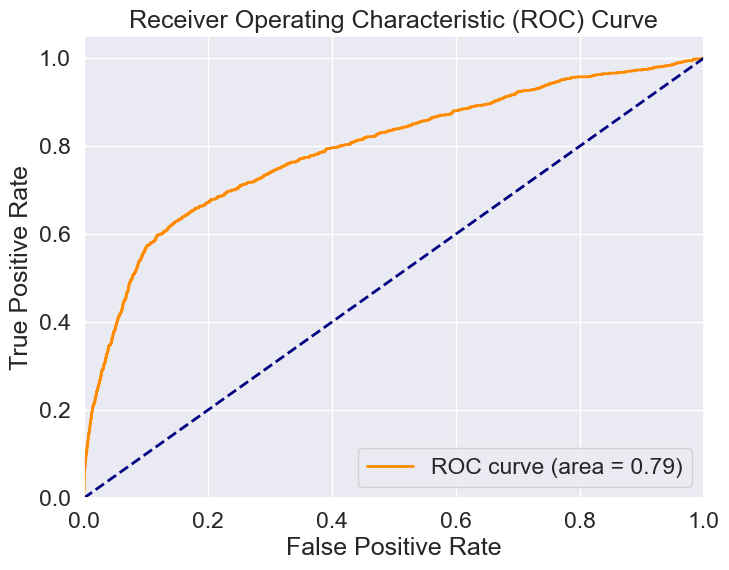

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Matthews Correlation Coefficient (MCC) for Model Evaluation:

In this section, we assess the logistic regression model's performance using the Matthews Correlation Coefficient (MCC), a metric that provides a balanced measure of classification performance.

**Understanding the Matthews Correlation Coefficient (MCC):**
The MCC is a single number that combines information from a confusion matrix (true positives, true negatives, false positives, and false negatives) into a comprehensive metric. It's especially useful when dealing with imbalanced datasets or when both sensitivity (true positive rate) and specificity (true negative rate) are crucial.

Range of Values: The MCC ranges from -1 to +1, where +1 indicates a perfect classification, 0 represents a random guess, and -1 signifies a perfectly incorrect prediction.

**Interpretation of the Results:**
In summary, the MCC score of 0.41 is a positive indication of your model's effectiveness in identifying potential customers. It offers a balanced evaluation that can guide marketing efforts in the context of a limited budget, helping us target the right individuals and maximize campaign efficiency.

In [29]:
from sklearn.metrics import matthews_corrcoef

# Assuming 'y_test' contains the true labels for the test dataset
mcc = matthews_corrcoef(y_test, pred_test)
print(mcc)


0.4128599173294339


<a id="14"></a>
## <p style="background-color:#8fb1e9;font-family:verdana;color:#FFF9ED; padding: 10px;font-size:100%;text-align:center;border-radius:10px 10px;">Conclusion</p>

In this project, we embarked on a journey to develop a predictive model for a marketing campaign, aiming to optimize the allocation of resources and enhance subscription rates. By using machine learning techniques, we analyzed and processed the dataset to create an effective model.

Our model demonstrated promising performance. To put the results in the context of our marketing campaign, let's consider the confusion matrix:

True Negatives: 9881
False Negatives: 632
True Positives: 792
False Positives: 1048
This information allows us to make several important observations:

The success rate of our marketing campaign, measured in terms of subscriptions, depends not only on the model's ability to identify subscribers but also on its ability to distinguish non-subscribers accurately. While the model's recall (ability to detect true subscribers) may be around 56%, it excels in precision, correctly identifying non-subscribers at an impressive rate of 94%. This precision holds substantial significance in the context of optimizing resource allocation.

SUCCESS RATE: TP/TP+FP = .43

**In practice, we can anticipate a success rate of approximately 43.02%. If we choose to contact only those individuals identified as positives by our model, roughly 3 out of every 7 calls would likely result in a subscription. This underscores the importance of precision and targeted outreach in maximizing the efficiency and effectiveness of our marketing efforts.**

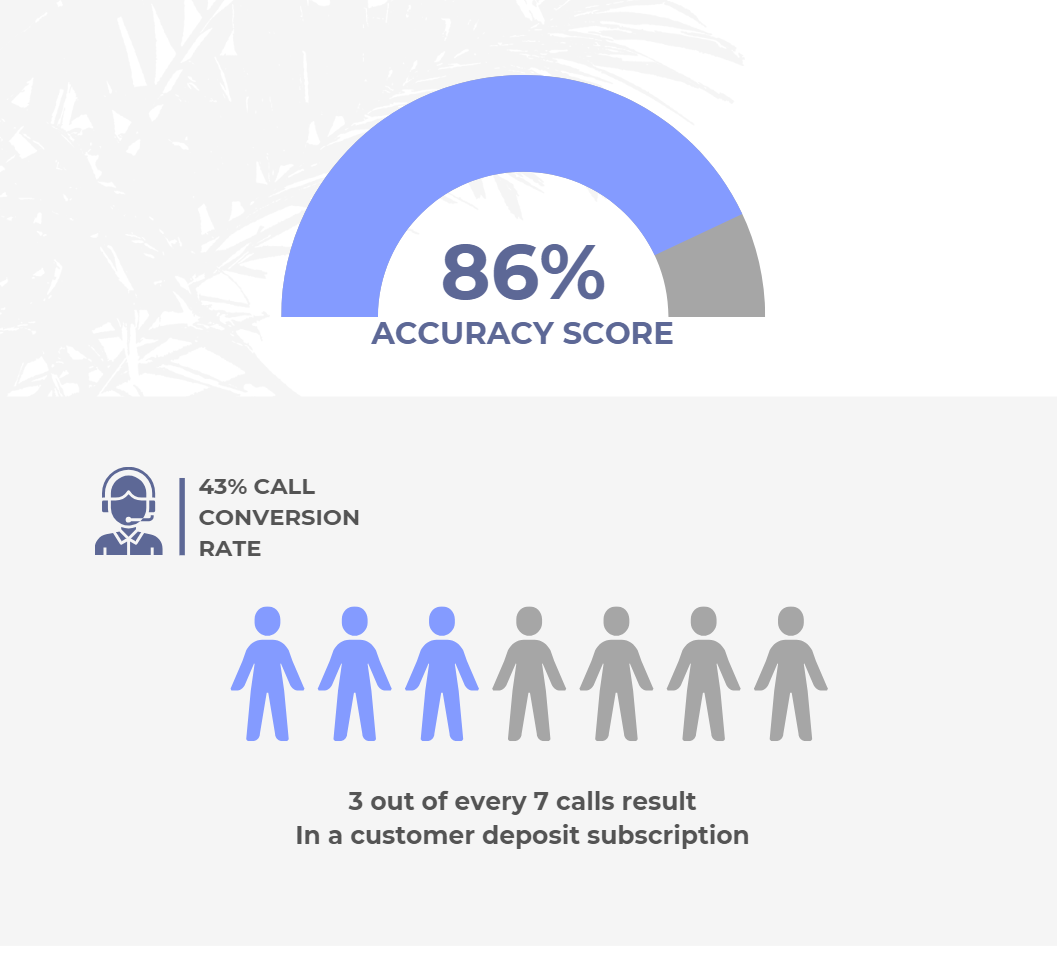

As we move forward, we should continue to balance precision and recall while considering the specific goals and constraints of our marketing strategy. Achieving this balance will enable us to make the most of our resources and increase the likelihood of turning potential leads into valued subscribers.

